In [1]:
%matplotlib inline

import sys
sys.path.append('../python/')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import imp
import cdr
import json
import os.path
from scipy.spatial.distance import cosine
from pandas.io.json import json_normalize
from scipy.spatial import distance
imp.reload(cdr)
import numpy as np
import fastcluster as fc
from pylab import *

from scipy.cluster import hierarchy

print ("Libraries loaded")



Libraries loaded


In [98]:
cdr = pd.read_csv('../../data/CDR/hash/cdr_time_raw.csv')
cdr = cdr[['adjusted_callIn', 'adjusted_callOut', 'adjusted_internet', 'adjusted_smsIn', 'adjusted_smsOut', 'region_id', 'time']]

In [3]:
internet = cdr.pivot(index='region_id', columns='time', values='adjusted_internet')

In [4]:
internet.fillna(0, inplace=True)

In [5]:
internet.head()

time,1.3832604e+12,1.383264e+12,1.3832676e+12,1.3832712e+12,1.3832748e+12,1.3832784e+12,1.383282e+12,1.3832856e+12,1.3832892e+12,1.3832928e+12,...,1.388502e+12,1.3885056e+12,1.3885092e+12,1.3885128e+12,1.3885164e+12,1.38852e+12,1.3885236e+12,1.3885242e+12,1.3885272e+12,1.3885278e+12
region_id,,,,,,,,,,,,,,,,,,,,,
1.0,122913.898747,105779.852430,87457.812869,71757.012913,61981.363964,54418.737100,52748.191473,56826.956148,64387.750055,80790.860883,...,105230.063898,94684.450210,78995.029808,67673.582237,71112.222656,79955.671528,90990.525644,0.0,102567.671325,0.0
2.0,99711.994472,93397.426718,82990.339386,69282.652696,55869.288204,44489.814336,41756.117562,44618.832460,54873.751083,67117.969553,...,41654.046204,37224.568621,31895.002036,30306.138357,32249.326645,37384.214836,38888.612397,0.0,42256.169063,0.0
3.0,51573.194553,51198.675032,44537.046818,37161.661749,30849.377875,26079.045392,24329.245247,27039.391909,30472.497752,34551.684876,...,33968.651263,32892.421211,31377.882798,30495.395472,31102.981044,32018.873138,32446.706990,0.0,33138.731568,0.0
4.0,55493.152388,54003.588097,46003.547260,38231.573552,29865.727287,24151.368871,22231.353321,24667.026813,30333.700809,33317.299899,...,19681.462336,19749.617580,19220.349538,19068.255157,18724.395137,19928.609662,19356.218695,0.0,18629.357653,0.0
5.0,44933.377755,38466.803797,33144.786401,28749.978254,28670.263101,27206.212977,31097.375575,38192.143813,45037.277886,53982.661957,...,47994.652868,47723.421411,45451.869838,41390.325939,40780.162168,38640.817906,38082.760154,0.0,36285.806393,0.0


In [108]:
x = internet.as_matrix()
mean = np.mean(internet, 0)
x_prime = np.zeros(shape=(85,mean.count()))

In [63]:
for i in range(0, 85):
    x_prime[i] = x[i] - mean
    
x_prime = np.transpose(x_prime)
xpp = pd.DataFrame(x_prime)
len(x_prime)

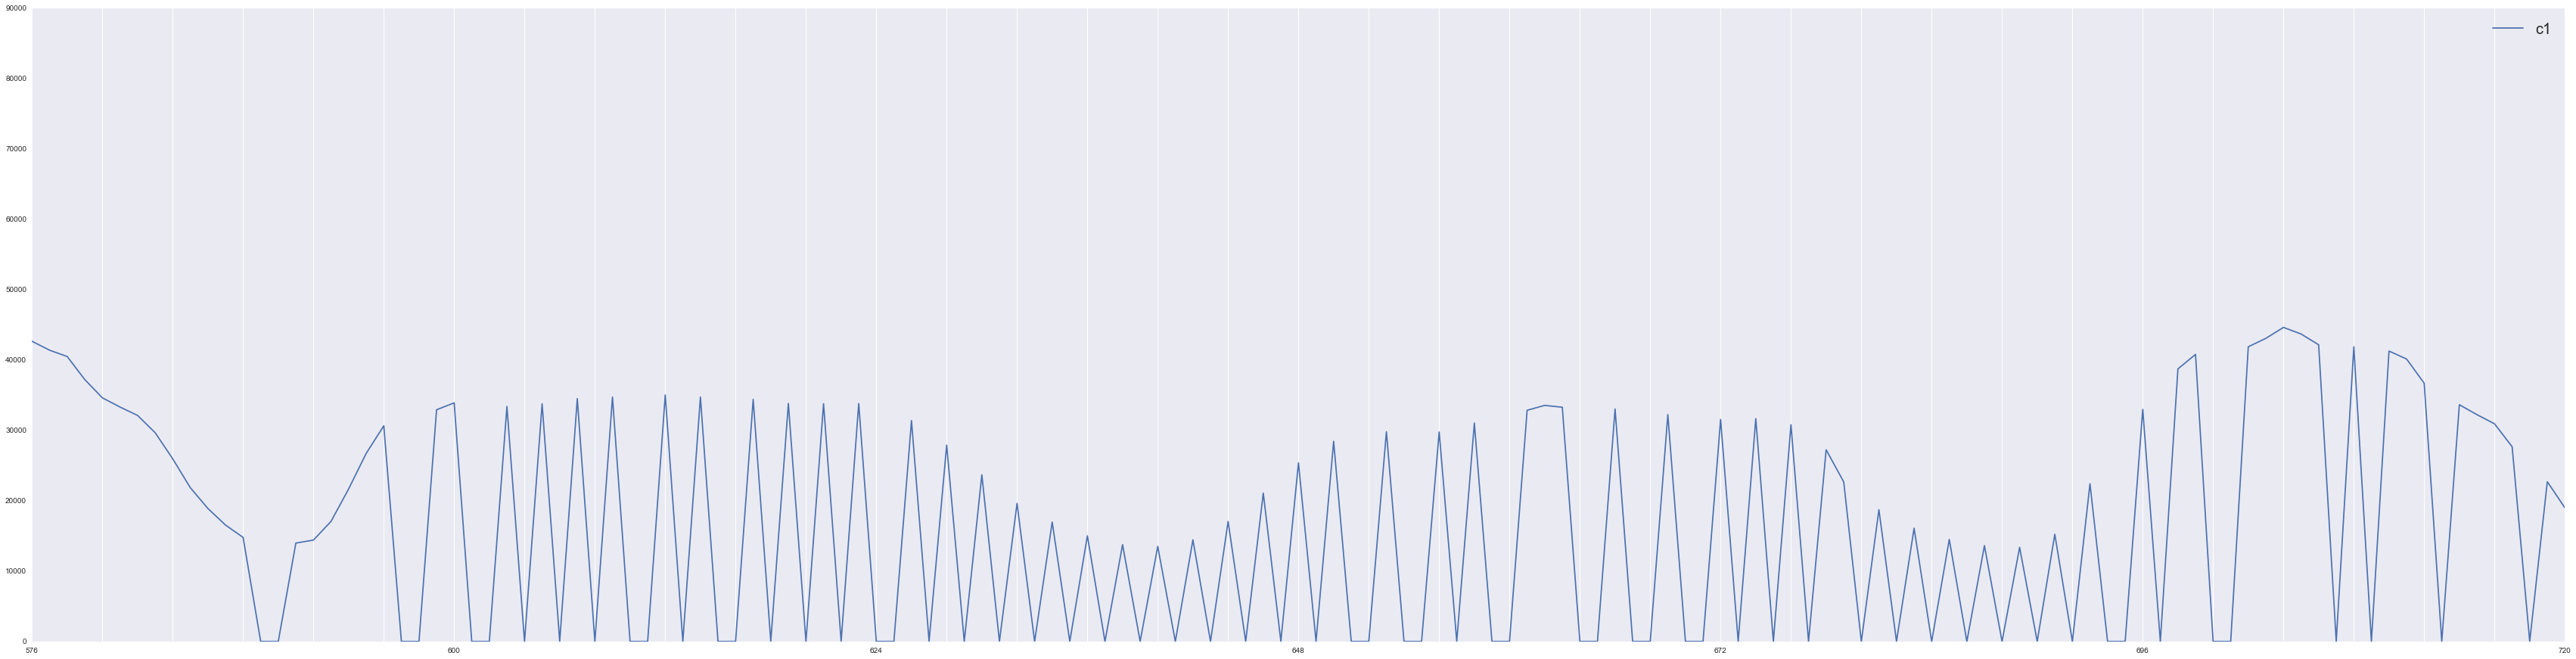

In [144]:

# drawing original graphs
xx = np.transpose(x)
xx = pd.DataFrame(xx)
xx = xx.T
xx.index = xx.index + 1

cdrr.index = cdrr.cluster


cluster1 = xx.mean()

x_range = 24*60

fig = plt.figure(figsize=(60,15))
ax = fig.add_subplot(1,1,1)
major_ticks = np.arange(0, x_range, 24)                                              
minor_ticks = np.arange(0, x_range, 4) 
ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)                                           
                                       

# and a corresponding grid                                                       

ax.grid(which='both')                                                            

ax.axis([576, 720 , 0, 90000])

ax.plot(cluster1, label="c1")
ax.legend(prop={'size':20})


In [142]:
fig.savefig('original.png')

In [12]:
corr = xpp.corr()
correlations_array = np.asarray(corr)

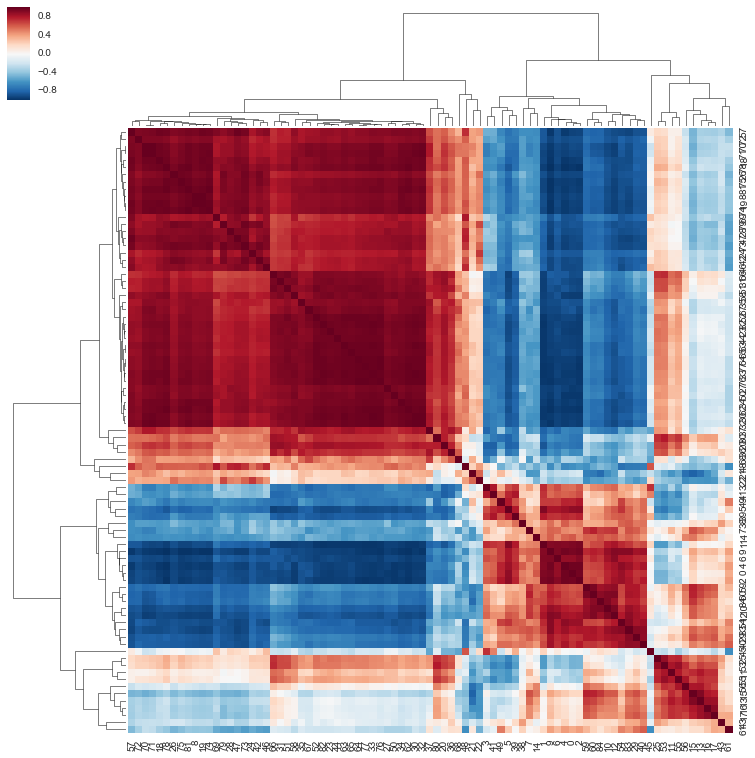

In [13]:

row_linkage = hierarchy.linkage(
    distance.pdist(correlations_array), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(correlations_array.T), method='average')

sns.clustermap(corr, row_linkage=row_linkage, col_linkage=col_linkage, method="average",
               figsize=(13, 13))

In [132]:
cdrr = pd.read_csv('../../data/CDR/hash/cdr-internet-clusters.csv')

In [66]:
xpp = xpp.T


In [67]:
xpp.index = xpp.index + 1

cdrr.index = cdrr.cluster


cluster1 = xpp[xpp.index.isin(cdr.region[cdr.index == 1])].mean()
cluster2 = xpp[xpp.index.isin(cdr.region[cdr.index == 2])].mean()
cluster3 = xpp[xpp.index.isin(cdr.region[cdr.index == 3])].mean()
cluster4 = xpp[xpp.index.isin(cdr.region[cdr.index == 4])].mean()
cluster5 = xpp[xpp.index.isin(cdr.region[cdr.index == 5])].mean()
cluster6 = xpp[xpp.index.isin(cdr.region[cdr.index == 6])].mean()

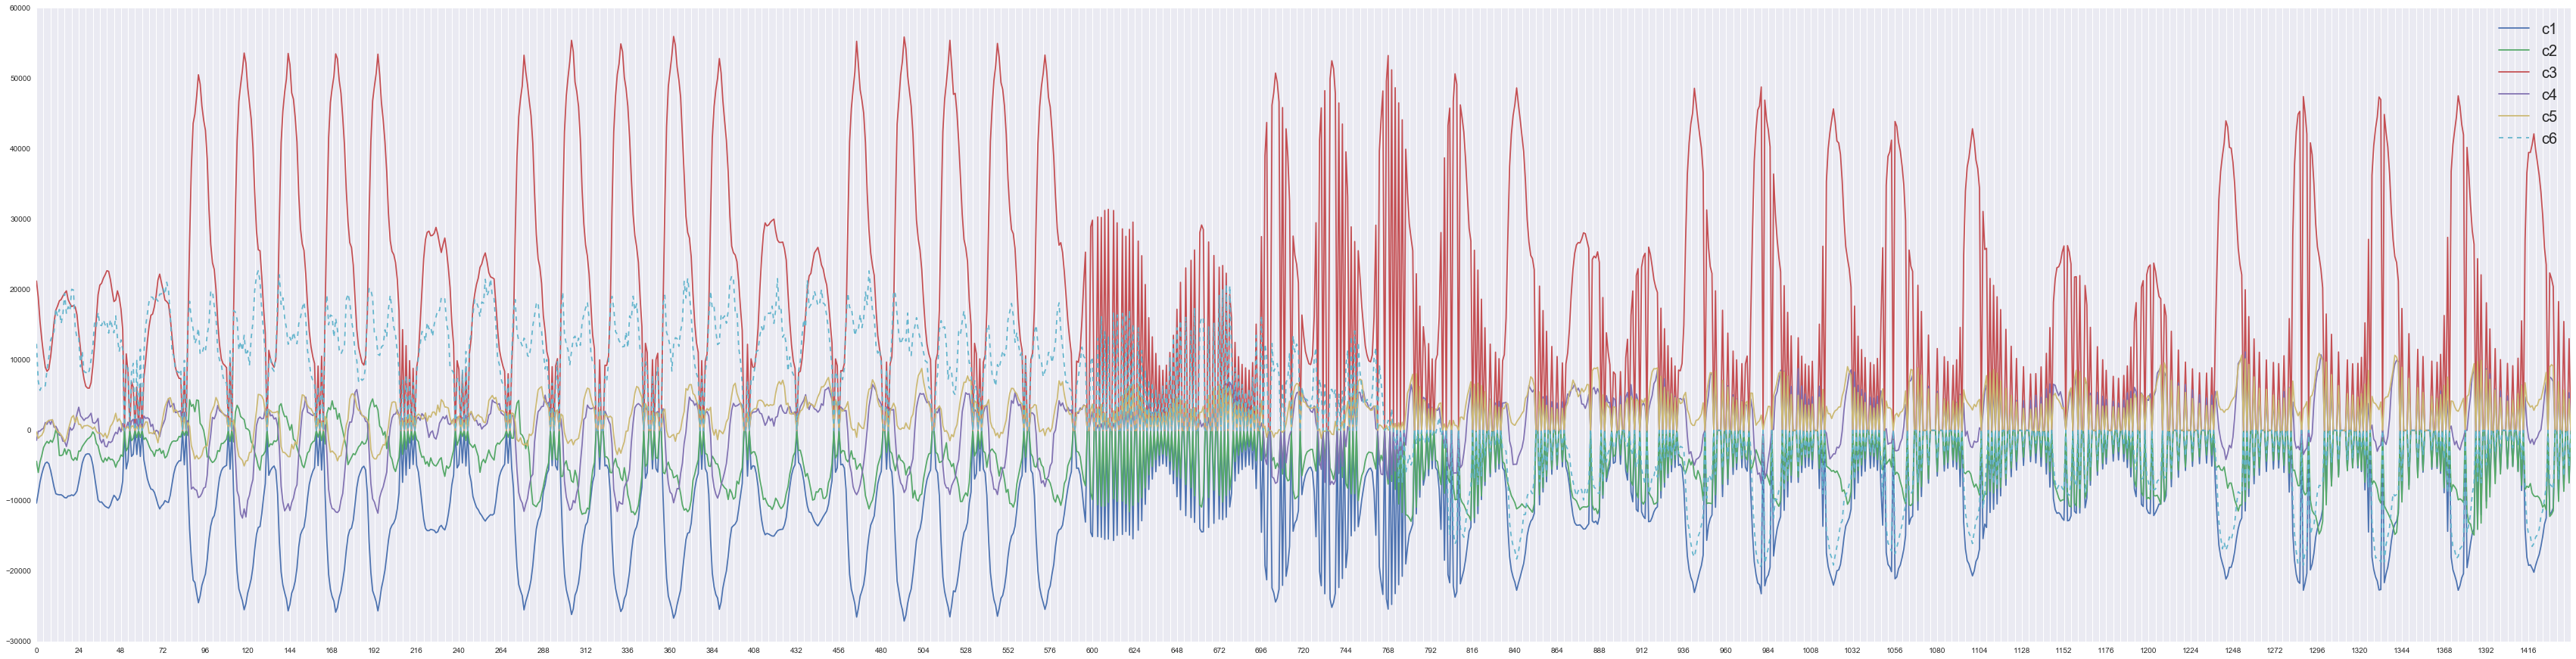

In [134]:
# November, first one week


x_range = 24*60

fig = plt.figure(figsize=(60,15))
ax = fig.add_subplot(1,1,1)
major_ticks = np.arange(0, x_range, 24)                                              
minor_ticks = np.arange(0, x_range, 4) 
ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)                                           
                                       

# and a corresponding grid                                                       

ax.grid(which='both')                                                            

ax.axis([0, x_range , -30000, 60000])

ax.plot(cluster1, label="c1")
ax.plot(cluster2, label="c2")
ax.plot(cluster3, label="c3")
ax.plot(cluster4, label="c4")
ax.plot(cluster5, label="c5")
ax.plot(cluster6, ls = '--',label="c6")
ax.legend(prop={'size':20})



In [135]:
fig.savefig('abc.png')

In [127]:
m = pd.DataFrame(mean)
m.index = range(0,2316)

In [128]:
m

,0
0,28009.667873
1,24161.259130
2,20737.233965
3,18062.054188
4,16246.119581
5,14812.832177
6,14805.032032
7,16466.368207
8,19695.491164
9,23866.043429


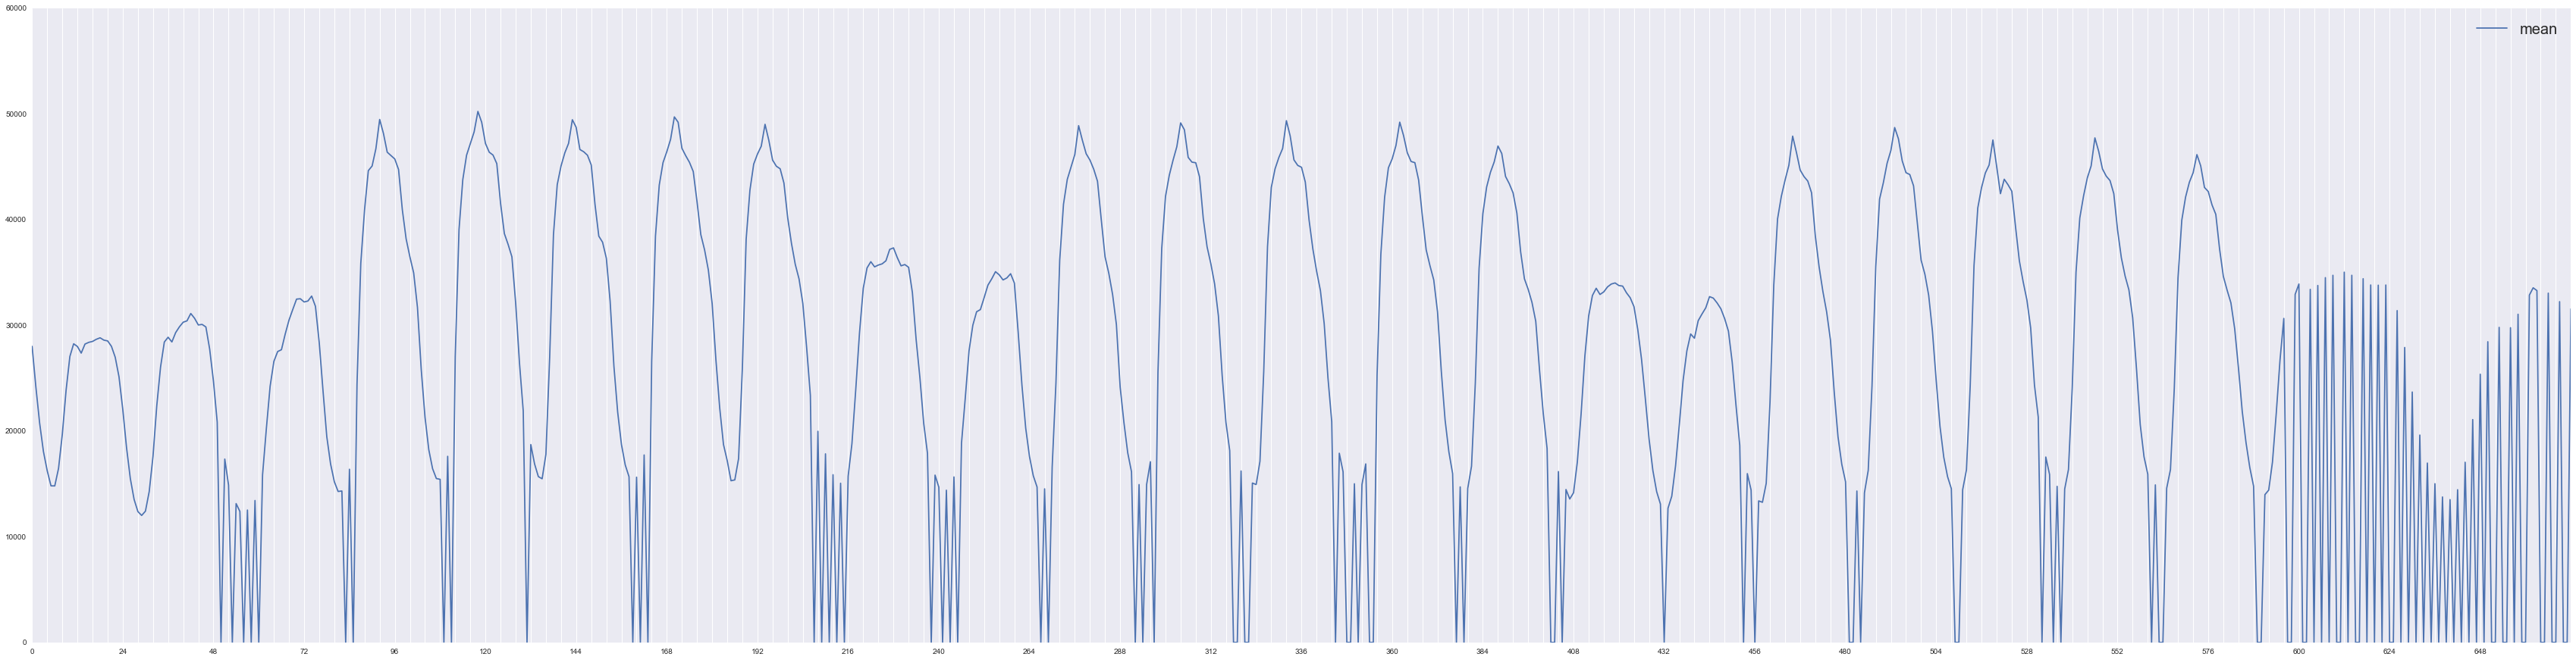

In [129]:
x_range = 24*28

fig = plt.figure(figsize=(60,15))
ax = fig.add_subplot(1,1,1)
major_ticks = np.arange(0, x_range, 24)                                              
minor_ticks = np.arange(0, x_range, 4) 
ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)                                           
                                       

# and a corresponding grid                                                       

ax.grid(which='both')                                                            

ax.axis([0, x_range , 0, 60000])

ax.plot(m, label="mean")

ax.legend(prop={'size':20})

In [130]:
fig.savefig('mean.png')

# CALL IN

In [131]:
cdrr

NameError: name 'cdrr' is not defined

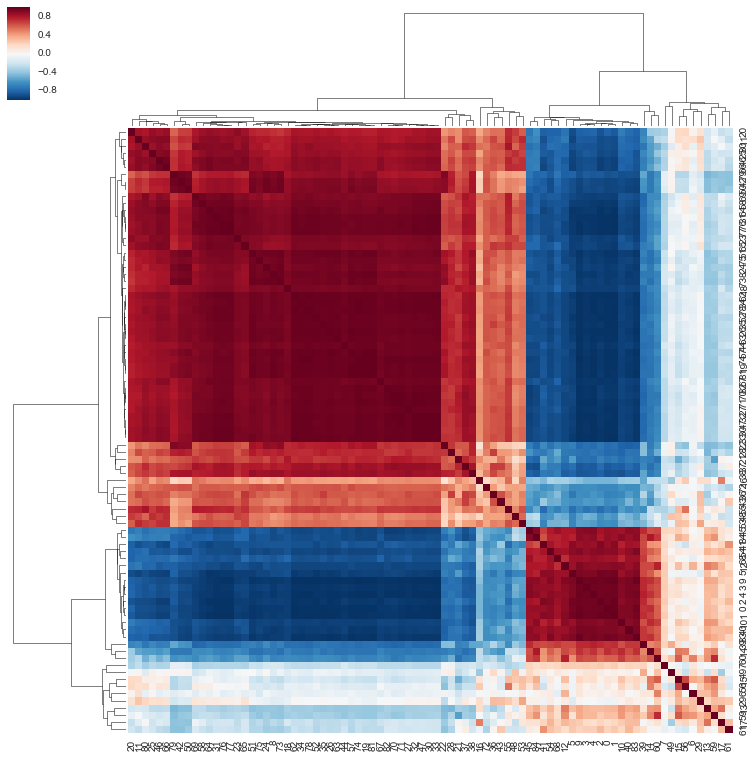

In [105]:
callin = cdr.pivot(index='region_id', columns='time', values='adjusted_callOut')
callin.fillna(0, inplace=True)
x = callin.as_matrix()
mean = np.mean(callin, 0)
x_prime = np.zeros(shape=(85,mean.count()))

for i in range(0, 85):
    x_prime[i] = x[i] - mean
    
x_prime = np.transpose(x_prime)
xpp = pd.DataFrame(x_prime)

corr = xpp.corr()
correlations_array = np.asarray(corr)

row_linkage = hierarchy.linkage(
    distance.pdist(correlations_array), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(correlations_array.T), method='average')

sns.clustermap(corr, row_linkage=row_linkage, col_linkage=col_linkage, method="average",
               figsize=(13, 13))




In [104]:
callin

time,1.3832604e+12,1.383264e+12,1.3832676e+12,1.3832712e+12,1.3832748e+12,1.3832784e+12,1.383282e+12,1.3832856e+12,1.3832892e+12,1.3832928e+12,...,1.388502e+12,1.3885056e+12,1.3885092e+12,1.3885128e+12,1.3885164e+12,1.38852e+12,1.3885236e+12,1.3885242e+12,1.3885272e+12,1.3885278e+12
region_id,,,,,,,,,,,,,,,,,,,,,
1.0,2378.704805,1511.550502,877.788918,958.026562,688.861246,457.778813,502.210068,799.544548,1527.504879,3264.202683,...,7538.292061,7306.635556,5967.305581,5374.147616,4411.359612,4173.777831,4532.050485,0.000000,5279.299313,0.000000
2.0,1781.125042,968.019376,790.700754,682.149730,539.954111,330.964719,256.404928,501.389263,1222.865844,2364.397177,...,4593.802802,4073.322849,3540.175034,3071.100162,2592.108954,1967.550878,1776.828536,0.000000,2021.478962,0.000000
3.0,953.027682,895.039715,584.276436,447.440687,388.560789,326.334231,228.056396,377.854819,999.233346,1795.288431,...,2946.454663,3086.251974,2995.880132,2278.875241,1934.427579,1221.513588,1042.600237,0.000000,1056.027058,0.000000
4.0,1172.026795,835.595216,645.007535,415.905831,320.343436,322.055267,217.199384,368.044603,860.765635,1666.762900,...,2757.715138,2988.788444,2888.397316,2649.960562,2079.505618,1343.768298,1054.199920,0.000000,1218.587426,0.000000
5.0,763.086534,454.112628,258.497764,216.101642,250.143336,318.736444,548.349216,1242.884861,2184.358515,3649.308673,...,4732.254722,5249.117311,4375.030272,3893.375934,2592.272483,1993.023931,1469.158930,0.000000,1348.391442,0.000000
6.0,698.186764,332.854018,243.922470,170.358322,216.401246,240.730877,275.970862,484.784863,1107.418030,2083.763180,...,2339.696934,2355.514153,2179.644250,1945.533837,1460.785633,1055.464579,786.638476,0.000000,702.778323,0.000000
7.0,1142.107399,652.630486,442.855485,306.046475,255.191916,187.662040,165.059504,195.429175,432.969499,949.863175,...,1664.126337,1697.920198,1644.711240,1649.683427,1214.055780,897.001372,571.432350,0.000000,669.822485,0.000000
8.0,734.945250,947.288809,1145.405909,1640.532590,1028.445781,853.166297,452.607905,286.597815,722.697843,1605.458741,...,2189.279114,2183.648786,1884.491541,1795.528177,1343.562000,809.328780,612.732214,0.000000,563.297374,0.000000
9.0,235.401002,155.561084,132.632680,95.104348,83.095910,92.691770,104.133419,177.050218,475.760622,1051.557378,...,1223.161983,1234.035782,1136.635896,931.951970,624.860685,435.831548,290.007293,0.000000,274.155038,0.000000


In [ ]:
#GRAPHE
x_range = 24*28

fig = plt.figure(figsize=(60,15))
ax = fig.add_subplot(1,1,1)
major_ticks = np.arange(0, x_range, 24)                                              
minor_ticks = np.arange(0, x_range, 4) 
ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)                                           
ax.set_yticks(major_ticks)                                                       
ax.set_yticks(minor_ticks, minor=True)                                           

# and a corresponding grid                                                       

ax.grid(which='both')                                                            

ax.axis([0, x_range , -30000, 60000])

ax.plot(cluster1, label="c1")
ax.plot(cluster2, label="c2")
ax.plot(cluster3, label="c3")
ax.plot(cluster4, label="c4")
ax.plot(cluster5, label="c5")
ax.plot(cluster6, ls = '--',label="c6")
ax.legend(prop={'size':20})